In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
N = 1000

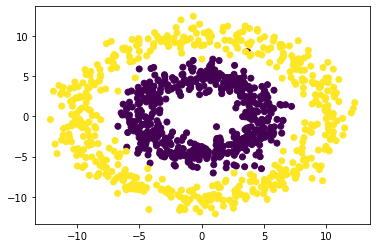

In [4]:
D = 2

R_inner = 5
R_outer = 10


R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [5]:
T.shape

(1000,)

In [6]:
X.shape

(1000, 2)

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, T, random_state = 0)

In [8]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

In [9]:
precision

array([0.988, 0.988, 0.988, 0.988, 0.988, 0.992, 0.992, 0.992])

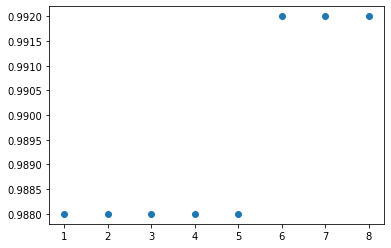

In [10]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

In [11]:
#answer = knn.predict(val_X)
#train_X.shape
#print (answer, val_y)
answer.shape

(250,)

In [12]:
np.mean(answer == val_y)

0.992

# XOR with KNN

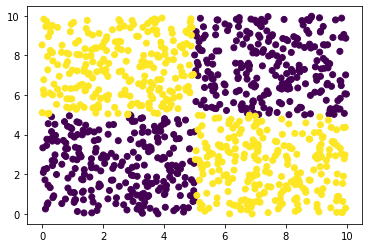

In [13]:
width = 10
half = width//2
first_quat = np.concatenate([[half * np.random.random(N//4) + half],[half * np.random.random(N//4) + half]]).T
second_quat = np.concatenate([[half * np.random.random(N//4)],[half * np.random.random(N//4) + half]]).T
third_quat = np.concatenate([[half * np.random.random(N//4)],[half * np.random.random(N//4)]]).T
fourth_quat = np.concatenate([[half * np.random.random(N//4) + half],[half * np.random.random(N//4)]]).T

odd_quat = np.concatenate([first_quat, third_quat])
even_quat = np.concatenate([second_quat, fourth_quat])
Xxor = np.concatenate([odd_quat, even_quat])
Txor = np.array([0]*(N//2) + [1]*(N//2))

plt.scatter(Xxor[:,0], Xxor[:,1], c = Txor)
plt.show()

In [14]:
Xxor.shape

(1000, 2)

In [15]:
train_X, val_X, train_y, val_y = train_test_split(Xxor, Txor, random_state = 0)

In [16]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

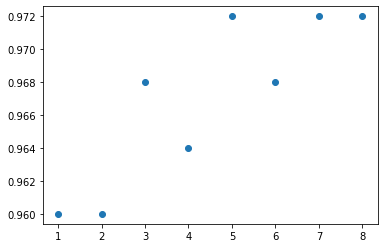

In [17]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

## Ellipse

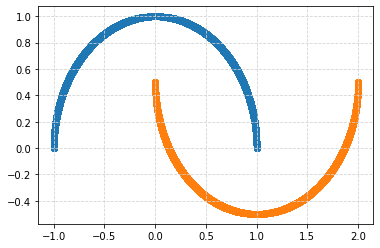

In [18]:
N2 = 10000

u1=0.     #x-position of the center
v1=0.    #y-position of the center
a1=1.     #radius on the x-axis
b1=1.    #radius on the y-axis

t1 = np.linspace(0, np.pi, N2)
El1 = np.array([u1+a1*np.cos(t1), v1+b1*np.sin(t1)])
u2=1.    #x-position of the center
v2=0.5    #y-position of the center
a2=1.     #radius on the x-axis
b2=1.    #radius on the y-axis

t2 = np.linspace(np.pi, 2*np.pi, N2)
El2 = np.array([u2+a2*np.cos(t2), v2+b2*np.sin(t2)])

plt.scatter(El1[0], El1[1])
plt.scatter(El2[0], El2[1])
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [19]:
El = np.concatenate([El1, El2],axis=1).T
print(El.shape)
Tel = np.array([0]*(N2) + [1]*(N2))
print(Tel.shape)

(20000, 2)
(20000,)


In [20]:
train_X, val_X, train_y, val_y = train_test_split(El, Tel, random_state = 0)

In [21]:
precision = np.zeros(8)
for k in range(1,9):
    knn = KNeighborsClassifier(weights='distance' , n_neighbors=k)
    knn.fit(train_X, train_y)
    answer = knn.predict(val_X)
    precision[k-1] = np.mean(answer == val_y)

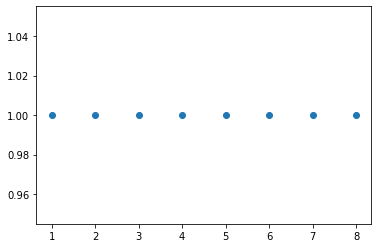

In [22]:
plt.scatter(range(1, precision.size + 1), precision)
plt.show()

## second problem metricks


In [23]:
import numpy as np
C="Cat"
F="Fish"
H="Hen"

# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H] 

"""

"""
precision = np.zeros(3)
recal = np.zeros(3)
matrix_confusion = np.array([[4,1,1],[6,2,2],[3,0,6]])
precision[0] = matrix_confusion[0,0] / np.sum(matrix_confusion[:,0])
precision[1] = matrix_confusion[1,1] / np.sum(matrix_confusion[:,1])
precision[2] = matrix_confusion[2,2] / np.sum(matrix_confusion[:,2])
recal[0] = matrix_confusion[0,0] / np.sum(matrix_confusion[0,:])
recal[1] = matrix_confusion[1,1] / np.sum(matrix_confusion[1,:])
recal[2] = matrix_confusion[2,2] / np.sum(matrix_confusion[2,:])
f1_score = np.zeros(3)
f1_score = 2 / (1/precision + 1/recal)
TP = matrix_confusion.trace()
FP = np.sum(matrix_confusion) - TP
accuracy = TP/(FP + TP)
weights = [6, 10, 9]
prec_mavg = np.average(precision)
recal_mavg = np.average(recal)
f1_mavg = np.average(f1_score)
prec_wavg = np.average(precision, weights=weights)
recal_wavg = np.average(recal, weights=weights)
f1_wavg = np.average(f1_score, weights=weights)
avg = [[prec_mavg, recal_mavg, f1_mavg],[prec_wavg, recal_wavg, f1_wavg]]

In [24]:
p = precision
r = recal
f1 =f1_score
digits=3
print(matrix_confusion)
target_names = ['Cat', 'Fish', 'Hen']
rows = zip(target_names, p, r, f1,)
headers = ["precision", "recall", "f1-score"]
width = len('weighted avg')
head_fmt = '{:>{width}s} ' + ' {:>9}' * len(headers)
report = head_fmt.format('', *headers, width=width)
report += '\n\n'
row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f}' * 3 + '\n'
for row in rows:
    report += row_fmt.format(*row, width=width, digits=digits)
report += '\n'
row_fmt_accuracy = '{:>{width}s} ' + \
                        ' {:>9.{digits}}' * 2 + ' {:>9.{digits}f}' + \
                        ' \n'
report += row_fmt_accuracy.format('accuracy', '', '',
                                  accuracy, width=width,
                                  digits=digits)
report += row_fmt.format('macro avg', *avg[0],
                                         width=width, digits=digits)
report += row_fmt.format('weighted avg', *avg[1],
                                         width=width, digits=digits)
print(report)

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score

         Cat      0.308     0.667     0.421
        Fish      0.667     0.200     0.308
         Hen      0.667     0.667     0.667

    accuracy                          0.480 
   macro avg      0.547     0.511     0.465
weighted avg      0.581     0.480     0.464



## Third Problem Linear Regresiion

In [43]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [63]:
X_sepal = iris.data[:, :4]
X_sepal

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
setosa_bool = iris.target == 0
versicolor_bool = iris.target == 1
virginica_bool = iris.target == 2

будем рассматривать данные для сорта setosa

In [95]:
X_setosa_sepal = X_sepal[setosa_bool]
len(X_setosa)

50

для начала взглянем на зланные для размеров sepal

Text(0, 0.5, 'Sepal width')

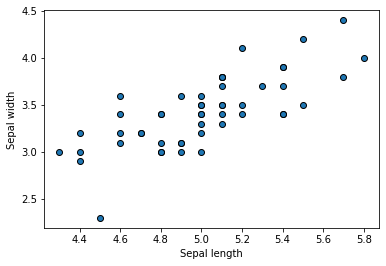

In [96]:
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

разобьём данные на training set и validation set

In [97]:
train_X, val_X, train_y, val_y = train_test_split(X_setosa_sepal[:,0], X_setosa_sepal[:,1], random_state = 0)

Построим линейную регрессию по training set

In [98]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(train_X.reshape(-1,1),train_y.reshape(-1,1))

LinearRegression()

Построим предсказанную кривую

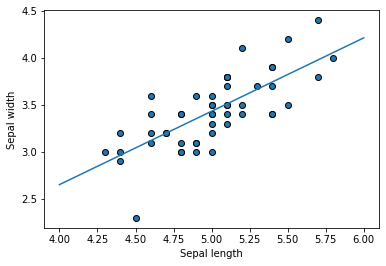

In [99]:
xfit = np.linspace(4, 6, 50)
yfit = linear_reg.predict(xfit[:, np.newaxis])
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.plot(xfit, yfit)

определим R^2 для training set и validation set 

In [100]:
y_pred = linear_reg.predict(val_X.reshape(-1,1))
Rsqr_test = linear_reg.score(train_X.reshape(-1,1), train_y.reshape(-1,1))
Rsqr_val = linear_reg.score(val_X.reshape(-1,1), val_y.reshape(-1,1))
print(Rsqr_test, Rsqr_val)

0.5820882073388745 0.4749226088096711


то же самое для трёх переменных

In [101]:
train_X, val_X, train_y, val_y = train_test_split(X_setosa_sepal[:,1:], X_setosa_sepal[:,0], random_state = 0)

In [102]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(train_X.reshape(-1,3),train_y.reshape(-1,1))

LinearRegression()

In [103]:
y_pred = linear_reg.predict(val_X.reshape(-1,3))
Rsqr_test = linear_reg.score(train_X.reshape(-1,3), train_y.reshape(-1,1))
Rsqr_val = linear_reg.score(val_X.reshape(-1,3), val_y.reshape(-1,1))
print(Rsqr_test, Rsqr_val)

0.5875765813720315 0.4925995264454268


In [104]:
len(X_setosa_sepal[:,0])

50

In [85]:
len(X_setosa_sepal[:,2])

50